Analisis Exploratorio de Datos Telecomunicaciones

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Los archivos furon descargados de la pagina https://datosabiertos.enacom.gob.ar/dashboards/20000/acceso-a-internet/

In [4]:
I_tecyloc = pd.read_csv('DATA\AccesosaInternetfijoportecnologiaylocalidad_2791751681952123859.csv')
I_portec= pd.read_csv('DATA\Internet_Accesos-por-tecnologia.csv')
I_BaF = pd.read_csv('DATA\Internet_BAF.csv')
I_loc_conint = pd.read_csv('DATA\Listadodelocalidadesconconectividadainternet_2750221682343504168.csv')
I_100hogares = pd.read_csv('DATA\Internet_Penetracion.csv')


Analisis de Accesosa Internet por tecnologia y localidad

In [6]:
I_tecyloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    0 non-null      float64
dtypes: float64(1), object(13)
memory usage: 343.8+ KB


In [7]:
I_tecyloc.describe(exclude='number')

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
count,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142
unique,24,432,2850,2718,724,693,86,706,219,24,12,606,1348
top,BUENOS AIRES,General Roca,OTROS,Sin Datos,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,1
freq,716,57,69,72,2016,2295,2760,1743,2537,2089,3131,934,193


In [8]:
#convierto todo a minusculas para trabajar con mas comodidad
I_tecyloc = I_tecyloc.apply(lambda x: x.astype(str).str.lower() if x.dtype == 'object' else x)

In [9]:
#cambio tambien los nombres de columnas
I_tecyloc= I_tecyloc.rename(columns=lambda x: x.lower())

In [10]:
I_tecyloc.describe(exclude='number')

,provincia,partido,localidad,link indec,adsl,cablemodem,dial up,fibra optica,otros,satelital,wimax,wireless,total general
count,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142
unique,24,432,2850,2718,724,693,86,706,219,24,12,606,1348
top,buenos aires,general roca,otros,sin datos,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,1
freq,716,57,69,72,2016,2295,2760,1743,2537,2089,3131,934,193


Se puede observar el analisis en 24 provincias, donde la mayor concentranción esta en Bs. As, en el partido de gral. Roca donde el Internet que mas utilizan es adsl.

In [11]:
#analizo unnamed 
I_tecyloc['unnamed: 13'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: unnamed: 13, dtype: float64

In [13]:
I_tecyloc['unnamed: 13'].shape

(3142,)

In [66]:
I_tecyloc['unnamed: 13'].isna().sum()

3142

In [14]:
#considero irrelevante ya que todos sus valores son nan, por lo tanto la borro
I_tecyloc = I_tecyloc.drop(columns= 'unnamed: 13')

In [15]:
I_tecyloc.head(2)

,provincia,partido,localidad,link indec,adsl,cablemodem,dial up,fibra optica,otros,satelital,wimax,wireless,total general
0,buenos aires,25 de mayo,25 de mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218
1,buenos aires,25 de mayo,del valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192


Analisis Para variables numericas de I_tecyloc(acceso internet por localidad) :

Transformo las columnas que contienen valores numericos porque estan como 'o'. Estan columnas son: link indec, cablemodem,	dial up,	fibra optica,	otros,	satelital,	wimax,	wireless,	total general

In [16]:
I_tecyloc['adsl'] = I_tecyloc['adsl'].replace('- 0','0')

In [33]:
I_tecyloc['adsl'] = I_tecyloc['adsl'].astype('float')

In [18]:
I_tecyloc['cablemodem'] = I_tecyloc['cablemodem'].replace('- 0','0')
I_tecyloc['cablemodem'] = I_tecyloc['cablemodem'].str.replace('.','')
I_tecyloc['cablemodem'] = I_tecyloc['cablemodem'].astype('float')

C:\Users\alumno\AppData\Local\Temp\ipykernel_536\3519638503.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  I_tecyloc['cablemodem'] = I_tecyloc['cablemodem'].str.replace('.','')


In [19]:
I_tecyloc['dial up'] = I_tecyloc['dial up'].replace('- 0','0')
I_tecyloc['dial up'] = I_tecyloc['dial up'].astype(float)

In [20]:
I_tecyloc['fibra optica'] = I_tecyloc['fibra optica'].replace('- 0','0')
I_tecyloc['fibra optica'] = I_tecyloc['fibra optica'].astype(float)

In [21]:
I_tecyloc['satelital'] = I_tecyloc['satelital'].replace('- 0','0')
I_tecyloc['satelital'] = I_tecyloc['satelital'].astype(float)

In [22]:
I_tecyloc['wimax'] = I_tecyloc['wimax'].replace('- 0','0')
I_tecyloc['wimax'] = I_tecyloc['wimax'].astype(float)

In [23]:
I_tecyloc['wireless'] = I_tecyloc['wireless'].replace('- 0','0')
I_tecyloc['wireless'] = I_tecyloc['wireless'].astype(float)

In [36]:
I_tecyloc['otros'] = I_tecyloc['otros'].replace('- 0','0')
I_tecyloc['otros'] = I_tecyloc['otros'].astype('float')

In [24]:
I_tecyloc['total general'] = I_tecyloc['total general'].replace('- 0','0')
I_tecyloc['total general'] = I_tecyloc['total general'].str.replace('.', '')
I_tecyloc['total general'] = I_tecyloc['total general'].astype(float)

C:\Users\alumno\AppData\Local\Temp\ipykernel_536\1458107848.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  I_tecyloc['total general'] = I_tecyloc['total general'].str.replace('.', '')


In [ ]:
#exportar los csv 
data = I_tecyloc
# Exportar el DataFrame a un archivo CSV
data.to_csv('(como quiero que se llame).csv', index=False)


In [46]:
I_tecyloc = pd.read_csv('I_tecyloc.csv')

In [48]:
# Obtener estadísticas descriptivas de todas las columnas numéricas
stats = I_tecyloc[['link indec', 'adsl', 'cablemodem',
       'dial up', 'fibra optica', 'otros', 'satelital', 'wimax', 'wireless', 'adls', ]].describe(include=[np.number])

# Obtener la fila correspondiente al valor máximo de cada columna
max_values = stats.loc['max']

# Obtener el nombre de la columna con el valor máximo
max_column = max_values.idxmax()

print("La columna con el valor máximo es:", max_column)


La columna con el valor máximo es: cablemodem


La tecnologia mas utilizda en el pais es 'cablemodem'. Es un dispositivo que se utiliza para proporcionar servicios de conexión a Internet 
de alta velocidad a través de una conexión de televisión por cable. Funciona como un puente entre
 la red de cable del proveedor de servicios y los dispositivos de la red local, como computadoras,
  tabletas y teléfonos inteligentes.

C:\Users\alumno\AppData\Local\Temp\ipykernel_536\621544461.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  por_provincia = I_tecyloc.groupby('provincia').sum()#['total_tecnologias']


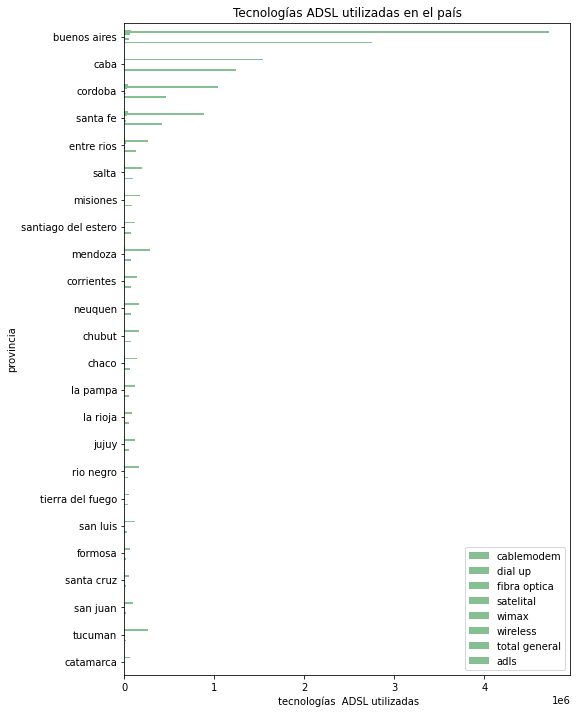

In [26]:

# Obtener estadísticas descriptivas de todas las columnas numéricas
stats = I_tecyloc[['link indec', 'adsl', 'cablemodem',
       'dial up', 'fibra optica', 'otros', 'satelital', 'wimax', 'wireless', 'adls', ]].describe(include=[np.number])

# Obtener la fila correspondiente al valor máximo de cada columna
max_values = stats.loc['max']

# Obtener el nombre de la columna con el valor máximo
max_column = max_values.idxmax()

#print("La columna con el valor máximo es:", max_column)


# agrupar por provincia y sumar la cantidad total de tecnologías utilizadas en cada provincia
por_provincia = I_tecyloc.groupby('provincia').sum()#['total_tecnologias']

# ordenar las provincias por la cantidad total de tecnologías utilizadas
por_provincia = por_provincia.sort_values(max_column)

# trazar un gráfico de barras para mostrar las cantidades
por_provincia.plot(kind='barh', figsize=(8, 12), color='#86bf91', zorder=2)

# añadir etiquetas y título
plt.xlabel(' tecnologías  ADSL utilizadas')
plt.title('Tecnologías ADSL utilizadas en el país')

# mostrar el gráfico
plt.show()


In [49]:
I_tecyloc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   provincia      3142 non-null   object 
 1   partido        3142 non-null   object 
 2   localidad      3142 non-null   object 
 3   link indec     3142 non-null   object 
 4   adsl           3142 non-null   float64
 5   cablemodem     3142 non-null   float64
 6   dial up        3142 non-null   float64
 7   fibra optica   3142 non-null   float64
 8   otros          3142 non-null   float64
 9   satelital      3142 non-null   float64
 10  wimax          3142 non-null   float64
 11  wireless       3142 non-null   float64
 12  total general  3142 non-null   float64
 13  adls           3142 non-null   float64
dtypes: float64(10), object(4)
memory usage: 343.8+ KB


C:\Users\alumno\AppData\Local\Temp\ipykernel_536\2752641920.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  por_provincia_pct = I_tecyloc[num_cols].groupby(I_tecyloc['provincia']).apply(lambda x: x/x.sum())
C:\Users\alumno\AppData\Local\Temp\ipykernel_536\2752641920.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', num_colors)


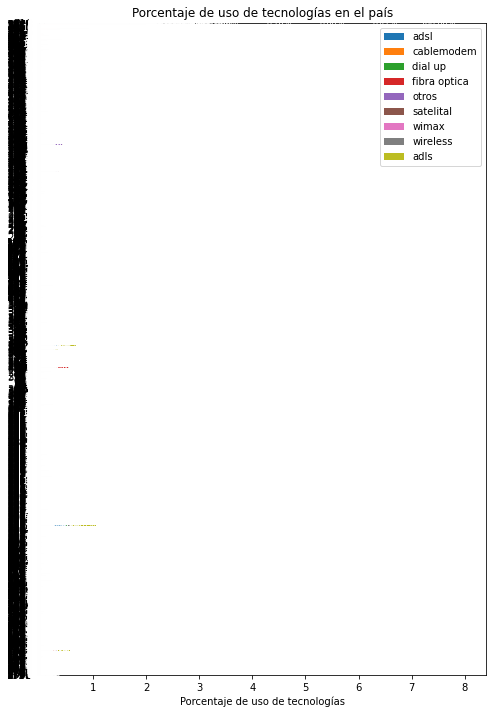

In [50]:
#import matplotlib.pyplot as plt
#import numpy as np

# Obtener las columnas numéricas
num_cols = ['adsl', 'cablemodem', 'dial up', 'fibra optica', 'otros', 'satelital', 'wimax', 'wireless', 'adls']

# Calcular el porcentaje de cada tecnología en cada provincia
por_provincia_pct = I_tecyloc[num_cols].groupby(I_tecyloc['provincia']).apply(lambda x: x/x.sum())

# ordenar las provincias por la cantidad total de la tecnología con mayor porcentaje
por_provincia_pct = por_provincia_pct.sort_values(max_column)

# trazar un gráfico de barras para mostrar las cantidades y los porcentajes de cada tecnología
ax = por_provincia_pct.plot(kind='barh', stacked=True, figsize=(8, 12), zorder=2)

# añadir etiquetas y título
ax.set_xlabel('Porcentaje de uso de tecnologías')
ax.set_title('Porcentaje de uso de tecnologías en el país')

# Asignar un color diferente a cada tecnología
num_colors = len(num_cols)
color_map = plt.cm.get_cmap('tab20', num_colors)
colors = color_map(np.linspace(0, 1, num_colors))
for i, tech in enumerate(num_cols):
    ax.patches[i].set_facecolor(colors[i])

# Mostrar los porcentajes de cada tecnología en la etiqueta de cada barra
for i, patch in enumerate(ax.patches):
    # Obtener la provincia y la tecnología correspondientes
    province = por_provincia_pct.index[i//num_colors]
    tech = num_cols[i%num_colors]
    # Obtener el porcentaje de uso de la tecnología en la provincia
    pct = por_provincia_pct.loc[province, tech] * 100
    # Mostrar el porcentaje en la etiqueta de la barra
    ax.text(patch.get_x() + patch.get_width()/2, patch.get_y() + patch.get_height()/2, 
            f'{pct:.2f}%', ha='center', va='center', color='white', fontsize=8)

# Mostrar el gráfico
plt.show()


Para ver la distribución de una variable categórica en un DataFrame, se puede utilizar el método "value_counts" de pandas o "countplot" de seaborn:

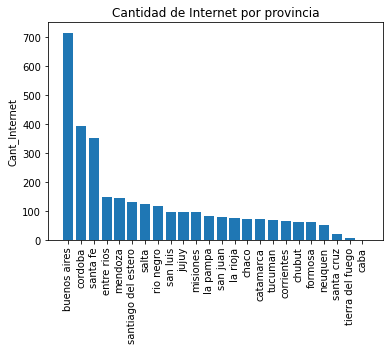

In [51]:
freq = I_tecyloc['provincia'].value_counts()
plt.bar(freq.index, freq.values)
plt.xticks(rotation=90)  # Rotamos los nombres en 90 grados
plt.ylabel('Cant_Internet')
plt.title('Cantidad de Internet por provincia')
plt.show()


Análisis bivariado:

Correlación entre variables numéricas:
Para ver la correlación entre dos variables numéricas en un DataFrame, se puede utilizar el método "corr" de pandas o "heatmap" de seaborn

C:\Users\alumno\AppData\Local\Temp\ipykernel_536\3911404896.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(I_tecyloc.corr(), annot=True, cmap='coolwarm')


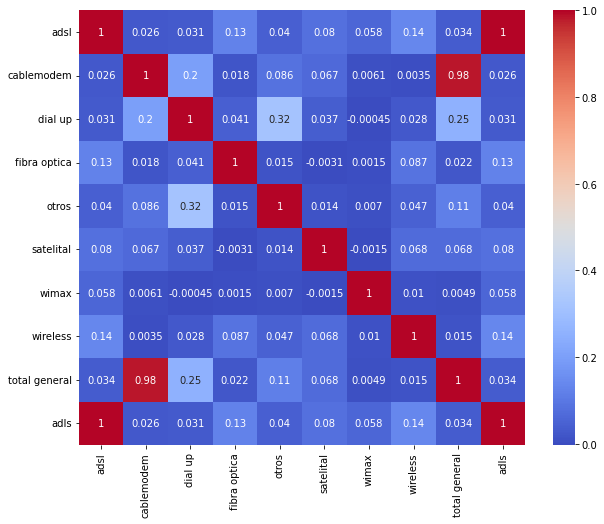

In [52]:
plt.figure(figsize=(10, 8))  # Definimos el tamaño de la figura

# Mapa de calor de correlación con seaborn
sns.heatmap(I_tecyloc.corr(), annot=True, cmap='coolwarm')
plt.show()

Correlación entre variables numéricas y categóricas:
Para ver la correlación entre una variable numérica y una categórica en un DataFrame, se puede utilizar el método "groupby" de pandas o "boxplot" de seaborn:

In [78]:
mean_total = I_tecyloc['total general'].mean()
mean_total

3529.9579885423295

In [77]:
media = I_tecyloc.groupby('provincia')['total general'].mean()
media

provincia
buenos aires           6.594508e+03
caba                   1.547679e+06
catamarca              9.762917e+02
chaco                  1.947919e+03
chubut                 2.631397e+03
cordoba                2.636213e+03
corrientes             2.228400e+03
entre rios             1.793060e+03
formosa                1.105452e+03
jujuy                  1.250768e+03
la pampa               1.415756e+03
la rioja               1.158187e+03
mendoza                1.996710e+03
misiones               1.917442e+03
neuquen                3.078509e+03
rio negro              1.349227e+03
salta                  1.662935e+03
san juan               1.292487e+03
san luis               1.258454e+03
santa cruz             2.250455e+03
santa fe               2.507938e+03
santiago del estero    9.156308e+02
tierra del fuego       7.699429e+03
tucuman                3.869368e+03
Name: total general, dtype: float64

[Text(0, 0, 'buenos aires'),
 Text(1, 0, 'caba'),
 Text(2, 0, 'catamarca'),
 Text(3, 0, 'chaco'),
 Text(4, 0, 'chubut'),
 Text(5, 0, 'cordoba'),
 Text(6, 0, 'corrientes'),
 Text(7, 0, 'entre rios'),
 Text(8, 0, 'formosa'),
 Text(9, 0, 'jujuy'),
 Text(10, 0, 'la pampa'),
 Text(11, 0, 'la rioja'),
 Text(12, 0, 'mendoza'),
 Text(13, 0, 'misiones'),
 Text(14, 0, 'neuquen'),
 Text(15, 0, 'rio negro'),
 Text(16, 0, 'salta'),
 Text(17, 0, 'san juan'),
 Text(18, 0, 'san luis'),
 Text(19, 0, 'santa cruz'),
 Text(20, 0, 'santa fe'),
 Text(21, 0, 'santiago del estero'),
 Text(22, 0, 'tierra del fuego'),
 Text(23, 0, 'tucuman')]

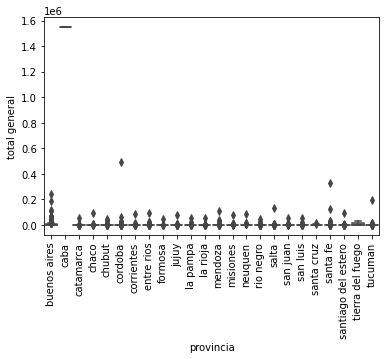

In [53]:
boxplot = sns.boxplot(x='provincia', y='total general', data=I_tecyloc)
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90)


Aca se puede observar que cordoba, santa fe, santiao del estero y tucuman tienen valores atipicos

In [54]:
cordoba = I_tecyloc.loc[I_tecyloc['provincia'] == 'cordoba']
cordoba.describe(exclude='number')

,provincia,partido,localidad,link indec
count,394,394,394,394
unique,1,27,385,382
top,cordoba,san justo,otros,sin datos
freq,394,37,6,6


In [55]:
cordoba.max()

provincia                    cordoba
partido                        unión
localidad        wenceslao escalante
link indec                 sin datos
adsl                           992.0
cablemodem                  222667.0
dial up                         44.0
fibra optica                   917.0
otros                          596.0
satelital                       11.0
wimax                           58.0
wireless                       993.0
total general               495182.0
adls                           992.0
dtype: object

el valor atipico de cordoba esta en la columna total_tecnologias tiene un valor exagerado 

In [56]:
cordoba.describe()

,adsl,cablemodem,dial up,fibra optica,otros,satelital,wimax,wireless,total general,adls
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,113.475076,1181.373096,0.172589,59.556904,10.539147,0.253807,0.147208,96.185777,2636.213198,113.475076
std,227.585753,11529.130394,2.349957,168.717045,62.320391,0.782472,2.921998,162.784977,25276.308825,227.585753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,36.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.500000,217.500000,0.000000
75%,94.750000,0.000000,0.000000,3.430500,0.000000,0.000000,0.000000,110.750000,986.000000,94.750000
max,992.000000,222667.000000,44.000000,917.000000,596.000000,11.000000,58.000000,993.000000,495182.000000,992.000000


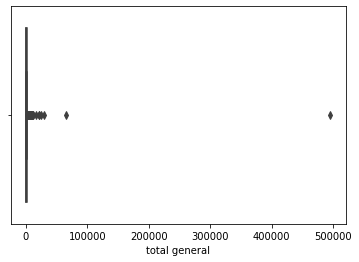

In [58]:
# 
df_co = I_tecyloc[I_tecyloc['provincia'] == 'cordoba']

# Genero un boxplot de la columna "total general"
sns.boxplot(x='total general', data=df_co)

# Identifico los valores que se encuentran fuera de los bigotes del boxplot
q1 = df_co['total general'].quantile(0.25)
q3 = df_co['total general'].quantile(0.75)
iqr = q3 - q1
outliers = df_co[(df_co['total general'] < q1 - 1.5*iqr) | (df_co['total general'] > q3 + 1.5*iqr)]

# Muestro los valores de los outliers
#print(outliers)
#print('la cantidad e outlier son', outliers.sum())

Los valores comunes de uso de las tecnologias es de aproximadamente 50000 pero tenemos dos outlier uno de casi 100000 y otro de 500000, en otro analisis mas profundo investigaremos sobre esto.

Analisis por Internet por tecnologias, por provincias en periodod de tiempo

In [28]:
I_portec

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,3,Buenos Aires,339.648,2.748.325,1.436.433,126.846,70.416,4.721.668
1,2022,3,Capital Federal,140.791,1.240.125,129.218,5.758,31.787,1.547.679
2,2022,3,Catamarca,10.010,10.495,46.224,1.329,2.235,70.293
3,2022,3,Chaco,27.164,61.800,44.645,8.178,2.359,144.146
4,2022,3,Chubut,45.377,72.212,9.574,29.784,8.831,165.778
...,...,...,...,...,...,...,...,...,...
836,2014,1,Santa Fe,322.662,174.296,3.059,5.951,644.000,506.612
837,2014,1,Santiago Del Estero,32.567,3.598,19,915.000,34.000,37.133
838,2014,1,Tierra Del Fuego,21.618,2.837,648,1.000,2.934,28.038
839,2014,1,Tucumán,129.717,83,121,13.000,98.000,130.032


In [29]:
I_portec.describe(exclude='number')

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Total
count,841,841,840,840,840,840,840
unique,11,8,24,748,729,592,831
top,2021,3,Buenos Aires,22.636,34.984,19,32.557
freq,96,192,35,9,15,17,3


Aca se puede observar que en el tercer trimestre del 2021 la tecnología mas utilizada fue Cablemodem. Un cable módem es un dispositivo que se utiliza para proporcionar servicios de conexión a Internet 
de alta velocidad a través de una conexión de televisión por cable. Funciona como un puente entre
 la red de cable del proveedor de servicios y los dispositivos de la red local, como computadoras,
  tabletas y teléfonos inteligentes.

In [59]:
#me llamó a atencion que trimestre tuviera 8 valores, cuando solo puede tener 4,investigue son datos estimativos
I_portec['Trimestre'].unique()

array(['3', '2', '1', '4', '3 *', '2 *', '1 *',
       'Los datos provinciales no coinciden a nivel nacional, ya que se rincorporó información que no contien apertuta a nivel geográfico.'],
      dtype=object)

In [30]:
I_portec.isna().sum()
#el último valor de cada columna o sea la última fila, es 'NaN' ya que no coinciden los valores 
# provinciales con los nacionales

Año             0
Trimestre       0
Provincia       1
ADSL            1
Cablemodem      1
Fibra óptica    1
Wireless        1
Otros           1
Total           1
dtype: int64

Hago un calculo de la tecnologia mas utilizada en el último trimestre del 2022, que es el último reporte

In [63]:
I_portec['Año'].max()

'2022'

In [60]:
# Seleccionar solo los datos del último trimestre del año 2022
ult_trimestre_2022 = I_portec[(I_portec['Año'] == 2022) & (I_portec['Trimestre'] == 4)]

# Calcular la suma total de cada tipo de tecnología
tecnologias = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
total_tecnologias = ult_trimestre_2022[tecnologias].sum()

# Encontrar la tecnología más utilizada en el último trimestre del año 2022
tecnologia_mas_utilizada = total_tecnologias.idxmax()

print("La tecnología más utilizada en el último trimestre del año 2022 fue:", tecnologia_mas_utilizada)


La tecnología más utilizada en el último trimestre del año 2022 fue: ADSL


Analisis de variables númericas.
Grafíco ADSL por timeste en cada provincia

In [64]:
I_portec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           841 non-null    object 
 1   Trimestre     841 non-null    object 
 2   Provincia     840 non-null    object 
 3   ADSL          840 non-null    object 
 4   Cablemodem    840 non-null    object 
 5   Fibra óptica  840 non-null    object 
 6   Wireless      840 non-null    float64
 7   Otros         840 non-null    float64
 8   Total         840 non-null    object 
dtypes: float64(2), object(7)
memory usage: 59.3+ KB


In [67]:
#debo pasarlas a float a las variables numéricas
I_portec['ADSL'] = I_portec['ADSL'].str.replace('.','')
I_portec['ADSL'] = I_portec['ADSL'].astype('float')

C:\Users\alumno\AppData\Local\Temp\ipykernel_536\3324570446.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  I_portec['ADSL'] = I_portec['ADSL'].str.replace('.','')


In [71]:
I_portec['Fibra óptica'] = I_portec['Fibra óptica'].str.replace('.','')
I_portec['Fibra óptica'] = I_portec['Fibra óptica'].astype('float')

C:\Users\alumno\AppData\Local\Temp\ipykernel_536\3306924117.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  I_portec['Fibra óptica'] = I_portec['Fibra óptica'].str.replace('.','')


In [ ]:
I_portec['Cablemodem'] = I_portec['Cablemodem'].str.replace('.','')
I_portec['Cablemodem'] = I_portec['Cablemodem'].astype('float')

In [73]:
#tuve que reeplazar '2019 *' por '2019' ya que salió error al querer transformarla a datetime
I_portec['Año'] =I_portec.loc[4, 'Año'] = '2019'


In [74]:
#año convertirlo a datetime
I_portec['Año'] =  pd.to_datetime(I_portec['Año'])

In [77]:
data = I_portec
# Exportar el DataFrame a un archivo CSV
data.to_csv('(I_porTecTrimestral.csv', index=False)


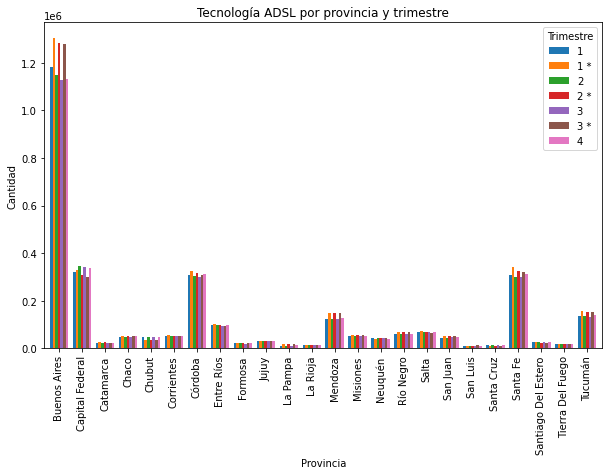

In [75]:



# Crear un DataFrame con los datos de la tecnología "ADSL" solamente
ADSL_por_provincia = I_portec[['Provincia', 'Trimestre', 'ADSL']]

# Utilizar "pivot table" para obtener los datos en un formato adecuado para graficar
ADSL_por_provincia_trimestre = ADSL_por_provincia.pivot_table(index='Provincia', columns='Trimestre', values='ADSL')

# Graficar los datos utilizando un gráfico de barras agrupadas por provincia
ADSL_por_provincia_trimestre.plot(kind='bar', figsize=(10,6), width=0.8)

# Agregar título y etiquetas de eje
plt.title('Tecnología ADSL por provincia y trimestre')
plt.xlabel('Provincia')
plt.ylabel('Cantidad')

# Mostrar la gráfica
plt.show()


In [84]:
I_portec['Total'] = I_portec['Total'].str.replace('.','')

C:\Users\alumno\AppData\Local\Temp\ipykernel_536\3073396341.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  I_portec['Total'] = I_portec['Total'].str.replace('.','')


In [85]:
I_portec['Total'] = I_portec['Total'].astype('float')

Analisis de Internet por velocidad y provincia

In [79]:
I_BaF.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022
2,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
3,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
4,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021


In [69]:
I_BaF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               35 non-null     int64  
 1   Trimestre         35 non-null     int64  
 2   Banda ancha fija  35 non-null     object 
 3   Dial up           35 non-null     float64
 4   Total             35 non-null     object 
 5   Periodo           35 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


transformaciones pertinentes a cada columna

In [82]:
#debo transformar  banda ancha y total a floaty periodo a fecha
I_BaF['Banda ancha fija'] = I_BaF['Banda ancha fija'].str.replace('.','')
I_BaF['Banda ancha fija'] = I_BaF['Banda ancha fija'].astype('float')

C:\Users\alumno\AppData\Local\Temp\ipykernel_536\3307235929.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  I_BaF['Banda ancha fija'] = I_BaF['Banda ancha fija'].str.replace('.','')


In [83]:
I_BaF['Total'] = I_BaF['Total'].str.replace('.','')
I_BaF['Total'] = I_BaF['Total'].astype('float')

C:\Users\alumno\AppData\Local\Temp\ipykernel_536\3022686986.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  I_BaF['Total'] = I_BaF['Total'].str.replace('.','')


In [115]:
#pase todas letras a minuscula para mejor transformacion
I_BaF['Periodo'] = I_BaF['Periodo'].apply(lambda x: x.lower())

In [116]:
#algunas columnas tenian ese termino los reeplace para poder pasarlo a datetime
I_BaF['Periodo'] = I_BaF['Periodo'].str.replace('sept','sep')

In [ ]:
I_BaF['Periodo'] = pd.to_datetime(I_BaF['Periodo'])


In [ ]:
I_BaF['Fecha'] = pd.to_datetime(I_BaF['Trimestre'], format='%b %Y')


In [119]:
#aca transformo a datetime#
import datetime
def trimestre_a_fecha(trimestre):
    meses = {'ene': 1, 'feb': 2, 'mar': 3, 'abr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dic': 12}
    partes = trimestre.split('-')
    mes = meses[partes[0].lower()]
    año = int(partes[1])
    fecha = datetime.datetime(año, mes, 1)
    return fecha


In [ ]:
I_BaF['Fecha'] = I_BaF['Trimestre'].apply(trimestre_a_fecha)


In [121]:
data = I_BaF
# Exportar el DataFrame a un archivo CSV
data.to_csv('(I_BanchaAngostaportimestre.csv', index=False)

In [123]:
I_BaF.describe()

,Año,Banda ancha fija,Dial up,Total
count,35.000000,3.500000e+01,35.000000,3.500000e+01
mean,2017.885714,8.274417e+06,23.383371,8.297800e+06
std,2.564135,1.408774e+06,10.087397,1.399611e+06
min,2014.000000,6.362108e+06,9.991000,6.398398e+06
25%,2016.000000,7.024946e+06,12.436500,7.057455e+06
50%,2018.000000,8.083533e+06,26.911000,8.110444e+06
75%,2020.000000,9.244537e+06,32.508500,9.260442e+06
max,2022.000000,1.107869e+07,39.324000,1.109113e+07


Puedo observar Internet por velocidad y provincia, hay registros desde el año 2014 hasta el 2022, el último trimestre analizado fue julio-septiembre.el maximo de banda ancha es mayor que dial up

In [119]:
I_loc_conint.head()

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,--,--,--,--,SI,SI,--,--,--
1,BUENOS AIRES,Bahía Blanca,Villa Espora,--,--,--,--,--,--,--,--,--
2,BUENOS AIRES,Balcarce,Balcarce,SI,SI,SI,SI,SI,SI,SI,SI,--
3,BUENOS AIRES,Balcarce,Los Pinos,--,--,--,--,--,--,SI,SI,--
4,BUENOS AIRES,Balcarce,Napaleofú,--,--,--,SI,SI,SI,SI,SI,--


In [121]:
I_loc_conint.describe()

,Provincia,Partido,Localidad,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,4G,3G,TELEFONIAFIJA,WIRELESS,SATELITAL
count,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312,4312
unique,24,444,3912,2,2,2,2,2,2,2,2,2
top,BUENOS AIRES,General Roca,San Pedro,--,--,--,--,SI,--,SI,SI,--
freq,901,85,12,3179,3436,3909,2866,2574,2432,2162,2242,3233


In [125]:
I_loc_conint['ADSL'].unique

<bound method Series.unique of 0        --
1       NaN
2       NaN
3       NaN
4        --
       ... 
4307     SI
4308     --
4309    NaN
4310    NaN
4311     --
Name: ADSL, Length: 4312, dtype: object>

In [126]:
I_loc_conint.isna().sum()

Provincia      1425
Unnamed: 1     1431
Localidad      1445
ADSL           1447
CABLEMODEM     1433
Unnamed: 5     1433
FIBRAOPTICA    1442
4G             1446
3G             1429
Unnamed: 9     1434
WIRELESS       1441
Unnamed: 11    1437
dtype: int64

Los nan se deben a que petenencen a otra bajada de internet

In [127]:
I_loc_conint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4312 entries, 0 to 4311
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Provincia    2887 non-null   object
 1   Unnamed: 1   2881 non-null   object
 2   Localidad    2867 non-null   object
 3   ADSL         2865 non-null   object
 4   CABLEMODEM   2879 non-null   object
 5   Unnamed: 5   2879 non-null   object
 6   FIBRAOPTICA  2870 non-null   object
 7   4G           2866 non-null   object
 8   3G           2883 non-null   object
 9   Unnamed: 9   2878 non-null   object
 10  WIRELESS     2871 non-null   object
 11  Unnamed: 11  2875 non-null   object
dtypes: object(12)
memory usage: 404.4+ KB


* Analisis de indicadores Macroeconomicos

In [128]:
macro = pd.read_csv('DATA\indicadoresmacro.csv')

In [129]:
macro.head()

,Año,Trimestre,IPC US,IPC AR,USDARS oficial,USDARS blue,PBI millones
0,2013,1,232773,298,"5,00","9,00",2.888.981
1,2013,2,233504,309,"5,00","9,00",3.387.811
2,2013,3,234149,331,"6,00","10,00",3.436.547
3,2013,4,233049,351,"6,00","11,00",3.679.896
4,2014,1,236293,402,"8,00","11,00",3.917.649


In [130]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Año             22 non-null     int64 
 1   Trimestre       22 non-null     int64 
 2   IPC US          22 non-null     int64 
 3   IPC AR          22 non-null     int64 
 4   USDARS oficial  22 non-null     object
 5   USDARS blue     22 non-null     object
 6   PBI millones    21 non-null     object
dtypes: int64(4), object(3)
memory usage: 1.3+ KB


In [131]:
macro.describe()

,Año,Trimestre,IPC US,IPC AR
count,22.000000,22.000000,22.000000,22.000000
mean,2015.272727,2.409091,239811.500000,657.000000
std,1.638287,1.140555,5470.373764,268.532697
min,2013.000000,1.000000,232773.000000,298.000000
25%,2014.000000,1.250000,236162.500000,440.000000
50%,2015.000000,2.000000,238237.500000,602.500000
75%,2016.750000,3.000000,243208.750000,868.250000
max,2018.000000,4.000000,251989.000000,1169.000000


anaisis realizado a Los Indicadores Macroeconomicos es que tiene un reistro trimestral desde 2013 hasta 2018, que el poder adquisitivo de USA aumento sinificativamente en el periodo analizado, lo cual se traduce a que su costo de vida aumentó, en comparacioó al de argentina. cabe tambien mencionar que en ese periodo El INDEC (Instituto Nacional de Estadísticas y Censos) es el organismo público encargado de producir y difundir información estadística oficial en Argentina, no funcionaba debidamente.

* Analisis Penetracion de Internet a 100 Hogares

In [132]:
I_100Hogares = pd.read_csv('DATA\Internet_Penetracion.csv')

In [133]:
I_100Hogares.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


In [137]:
I_100Hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [139]:
#debo convertir la columna  Acceso por c/100 hogares para poder hacer un correcto analisis
I_100Hogares['Accesos por cada 100 hogares'] = I_100Hogares['Accesos por cada 100 hogares'].str.replace(',','.')
I_100Hogares['Accesos por cada 100 hogares'] = I_100Hogares['Accesos por cada 100 hogares'].astype('float64')

In [152]:
I_100Hogares.describe(exclude='number')

,Trimestre,Provincia
count,840,840
unique,4,24
top,3,Buenos Aires
freq,216,35


In [153]:
I_100Hogares.describe()

,Año,Accesos por cada 100 hogares
count,840.000000,840.000000
mean,2017.885714,49.065750
std,2.528745,23.151885
min,2014.000000,9.350000
25%,2016.000000,32.107500
50%,2018.000000,45.900000
75%,2020.000000,61.865000
max,2022.000000,124.060000


El analisis para Internet cada 100 Hogares es que tiene registros desde 2014, hasta 2022 el maximo alcanzado fue de 124.060.000 y el minimo 9.350.000

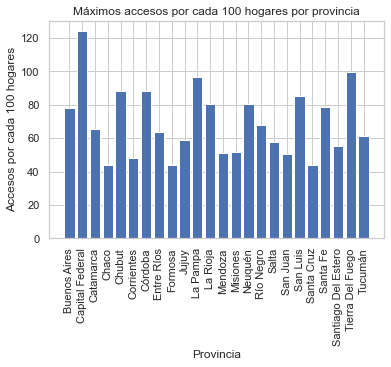

In [158]:
#import pandas as pd
#import matplotlib.pyplot as plt

# cargar los datos en un DataFrame
hogar = I_100Hogares

# agrupar por provincia y calcular el máximo de "Accesos por cada 100 hogares"
max_accesos = hogar.groupby('Provincia')['Accesos por cada 100 hogares'].max()

# crear el gráfico de barras
plt.bar(max_accesos.index, max_accesos.values)

# establecer el título y los ejes
plt.title('Máximos accesos por cada 100 hogares por provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=90)
# mostrar el gráfico
plt.show()


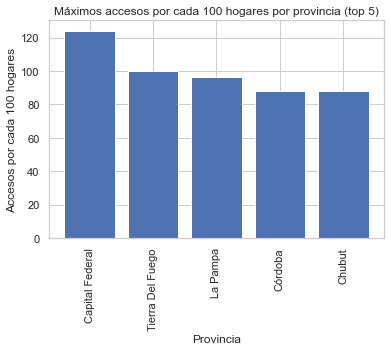

In [159]:
#se grafica las top 5 
hogar = I_100Hogares

# agrupar por provincia y calcular el máximo de "Accesos por cada 100 hogares"
max_accesos = hogar.groupby('Provincia')['Accesos por cada 100 hogares'].max()

# seleccionar las 5 mayores
top5_provincias = max_accesos.nlargest(5)

# crear el gráfico de barras
plt.bar(top5_provincias.index, top5_provincias.values)

# establecer el título y los ejes
plt.title('Máximos accesos por cada 100 hogares por provincia (top 5)')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')

# rotar los nombres del eje x
plt.xticks(rotation=90)

# mostrar el gráfico
plt.show()
